In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def log_interp(f,a,df):
    n = len(f);
    ni = int((f[n-1]-f[0])/df);
    fi = np.linspace(f[0],f[n-1],ni);
    ai = np.zeros(ni);
    for i in range(ni):
        ai[i] = 10**np.interp(np.log10(fi[i]),np.log10(f),np.log10(a));
    return fi,ai

In [3]:
def band_split(f,a,nb,df): # f : freq, a : psd, nb : # of bands
    fi,ai = log_interp(f,a,df);
    ni = len(fi);
    grms = np.sqrt(np.trapz(ai,fi))
    goal = grms/np.sqrt(nb);  # target grms
    idx = np.zeros(nb+1,dtype=int);
    idx[nb] = ni;
    j=0;
    for i in range(idx[j],ni+1):
        grms_tmp = np.sqrt(np.trapz(ai[idx[j]:i],fi[idx[j]:i]));
        if grms_tmp >= goal:
            idx[j+1] = i;
            j +=1;
        if j > nb:
            break;
    dai = []; dfi = [];
    for i in range(nb):
        dai.append(ai[idx[i]:idx[i+1]]);
        dfi.append(fi[idx[i]:idx[i+1]]);
    return dai,dfi

In [4]:
f = [20,100,2000]; a = [0.1,5,5]; df = 0.5; nb=3;
dai,dfi = band_split(f,a,nb,df);

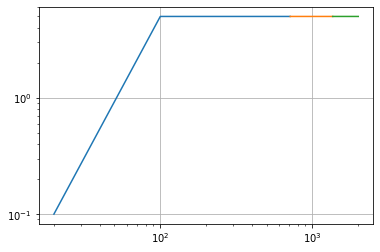

In [8]:
plt.figure();
for i in range(nb):
    plt.plot(dfi[i],dai[i]);
    plt.xscale('log'); plt.yscale('log');
    plt.grid();

In [9]:
for i in range(nb):
    print("%.4f"%(np.sqrt(np.trapz(dai[i],dfi[i]))));

56.7101
56.7081
56.6419
